<a href="https://www.kaggle.com/code/isabelleyang1/earthquake-analysis-from-tweets?scriptVersionId=138523154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Analysis Report: Earthquake Analysis from Tweets

## Introduction
In this analysis, we explore a dataset of earthquake data to gain insights into the magnitudes, locations, and temporal patterns of earthquakes.

## Dataset Description
The dataset contains information about earthquakes, including the DateTime, Tweet ID, text included in the tweet, and the username of the person who created the tweek. This is the link to the dataset I used: [https://www.kaggle.com/datasets/aryansingh0909/earthquakes-alerts-tweets-dataset-daily-updated](http://)

## Data Cleaning
To prepare the data for analysis, I performed the following cleaning steps:

1. Loaded the dataset into a pandas DataFrame.
2. Sorted the values by DateTime.
3. Handled missing values, if any.
4. Handeld duplicate values, if any.
5. Split the "datetime" column into "date" and "time" columns.
6. Dropped the unnecessary columns such as the "Username" column.
7. Split the "Date" column into "Year", "Month", and "Day".
8. Extracted the "Hour" from the "Time" column.
10. Created new columns from extracted information from the "Text" column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/earthquakes-alerts-tweets-dataset-daily-updated/QuakesToday.csv')

In [3]:
#sort by DateTime
df = df.sort_values('Datetime')

In [4]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values)

Datetime    0
Tweet Id    0
Text        0
Username    0
dtype: int64


In [5]:
# Check for duplicate records in the DataFrame
duplicates = df.duplicated()
print(duplicates)

15495    False
15494    False
15493    False
15492    False
15491    False
         ...  
4        False
3        False
2        False
1        False
0        False
Length: 15496, dtype: bool


In [6]:
# Drop the duplicate records from the DataFrame
df = df.drop_duplicates()

In [7]:
# Split the "datetime" column into "date" and "time" columns
df[['Date', 'Time']] = df['Datetime'].str.split(' ', expand=True)

In [8]:
#Drop the "Username" column
df = df.drop('Username', axis=1)

In [9]:
# Split the "Date" column into "Year", "Month", and "Day"
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-', 2).str

/tmp/ipykernel_20/1714857351.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-', 2).str
/tmp/ipykernel_20/1714857351.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-', 2).str


In [10]:
# Extract the "Hour" from the "Time" column
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

In [11]:
# Extract the "Magnitude" from the "Text" column
df['Magnitude'] = df['Text'].str.extract(r'(\d+(?:\.\d+)?)\s*magnitude').astype(float)

In [12]:
#Create a new column for hashtags
df['Hashtags'] = df['Text'].str.findall(r'#(\w+)')

In [13]:
# Create a new column for the extracted location
df['Location'] = df['Text'].str.extract(r'(\d+\s*km\s*from|ESE\s*of)?\s*([\w\s]+),', expand=False)[1]

In [14]:
# Remove whitespaces from the Location column
df['Location'] = df['Location'].str.strip()

## Analysis Objectives
My analysis objectives include:

1. Analyzing the distribution of earthquake magnitudes.
2. Analysis of the most commonly used hashtags.
3. Examining the correlation between magnitude and hour.

## Analysis and Visualizations
### Magnitude Analysis

In [15]:
#Calculate basic statistics for the magnitude column
magnitude_stats = df['Magnitude'].describe()
magnitude_stats

count    15496.000000
mean         2.594231
std          1.127362
min          1.500000
25%          1.800000
50%          2.100000
75%          3.000000
max          7.700000
Name: Magnitude, dtype: float64

The distribution of earthquake magnitudes:

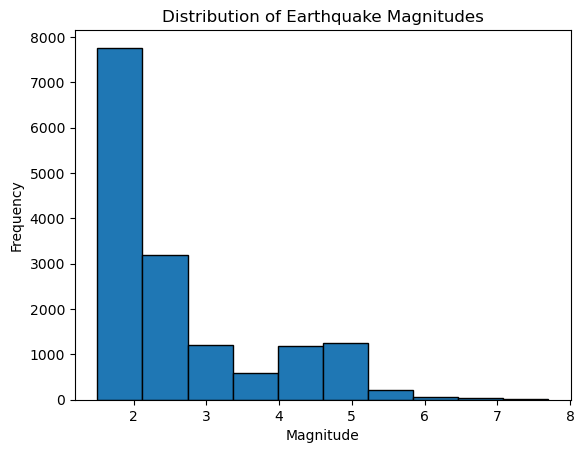

In [16]:
# Histogram
plt.hist(df['Magnitude'], bins=10, edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes')
plt.show()

The monthly average earthquake magnitudes:

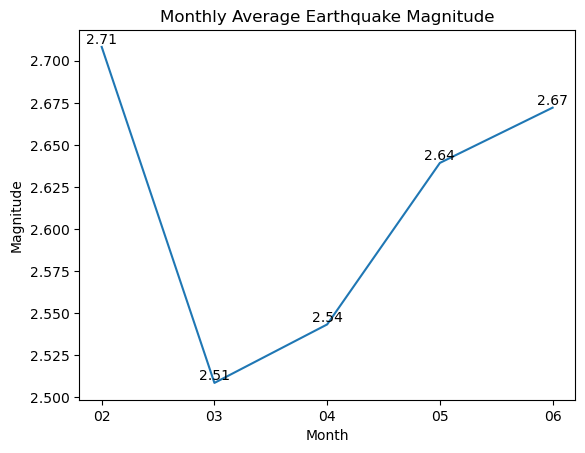

In [17]:
monthly_avg = df.groupby('Month')['Magnitude'].mean()
# Scatter plot of magnitudes over time
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xlabel('Month')
plt.ylabel('Magnitude')
plt.title('Monthly Average Earthquake Magnitude')
for x, y in zip(monthly_avg.index, monthly_avg.values):
    plt.text(x, y, round(y, 2), ha='center', va='bottom')

plt.show()

The counts of earthquakes by magnitude range:

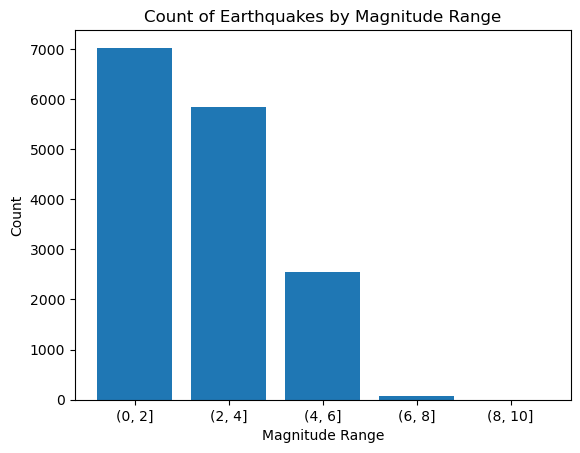

In [18]:
# Bar plot of count by magnitude range
magnitude_ranges = pd.cut(df['Magnitude'], bins=[0, 2, 4, 6, 8, 10])
magnitude_counts = magnitude_ranges.value_counts().sort_index()
plt.bar(magnitude_counts.index.astype(str), magnitude_counts.values)
plt.xlabel('Magnitude Range')
plt.ylabel('Count')
plt.title('Count of Earthquakes by Magnitude Range')
plt.show()

Monthly Distribution of Earthquakes:

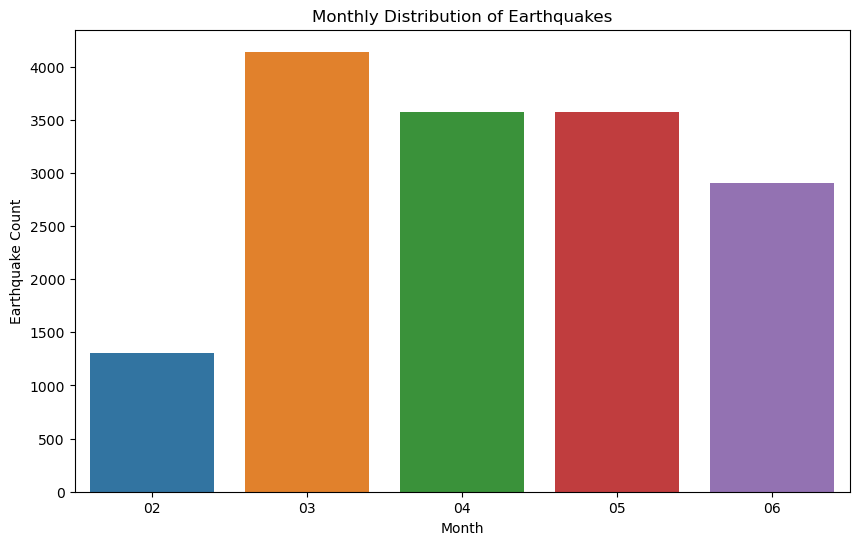

In [19]:
monthly_count = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_count.index, y=monthly_count.values)
plt.xlabel('Month')
plt.ylabel('Earthquake Count')
plt.title('Monthly Distribution of Earthquakes')
plt.show()

Hourly distribution of Earthquakes

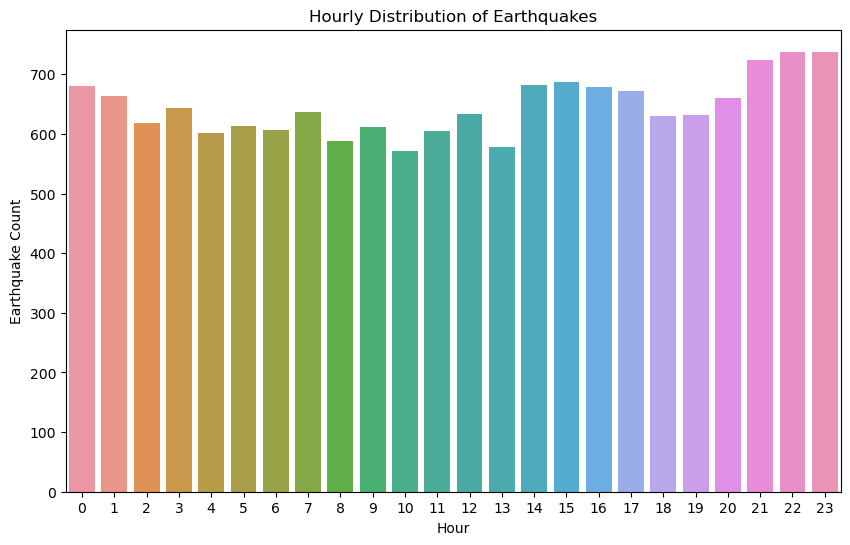

In [20]:
hourly_count = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_count.index, y=hourly_count.values)
plt.xlabel('Hour')
plt.ylabel('Earthquake Count')
plt.title('Hourly Distribution of Earthquakes')
plt.show()

### Hashtag Analysis

Top 10 Hashtags Used:

In [21]:
# Extract all unique hashtags from the dataset
all_hashtags = set(tag for tags in df['Hashtags'] for tag in tags)

# Count the occurrence of each hashtag
hashtag_counts = {}
for hashtags in df['Hashtags']:
    for tag in hashtags:
        hashtag_counts[tag] = hashtag_counts.get(tag, 0) + 1

# Sort the hashtags based on their counts in descending order
sorted_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)

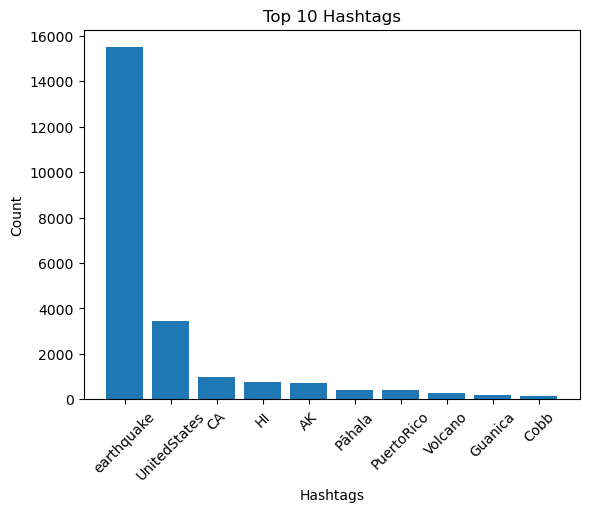

In [22]:
# Select the top 10 hashtags
top_n = 10
top_hashtags = sorted_hashtags[:top_n]

# Extract the hashtags and their corresponding counts
hashtags = [tag for tag, count in top_hashtags]
counts = [count for tag, count in top_hashtags]

# Create a bar plot to visualize the top hashtags
plt.bar(hashtags, counts)
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top {} Hashtags'.format(top_n))
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

Correlation between Magnitude and Hour:

In [23]:
correlation_matrix = df[['Magnitude', 'Year', 'Month', 'Day', 'Hour']].corr()
print(correlation_matrix)

           Magnitude      Hour
Magnitude   1.000000 -0.038246
Hour       -0.038246  1.000000


/tmp/ipykernel_20/1095415615.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Magnitude', 'Year', 'Month', 'Day', 'Hour']].corr()


## Findings and Conclusions
Based on our analysis, we made the following findings:

* The distribution of earthquake magnitudes is skewed towards lower magnitudes, with few high-magnitude earthquakes.
* The average earthquake magnitude over each month did not vary much. It stayed within the 2-3 range.
* The 0-2 magnitude range contained the highest earthquake counts while the 6-8 range contained the fewest counts.
* There is no significant correlation between the magnitude of earthquakes and the hour of occurrence.
* The top hashtags related to earthquakes and the United States, suggesting that hashtags were used more often when describing events in the US. 
* The correlation analysis indicates a weak correlation between magnitude and hour, suggesting that the magnitude of an earthquake is not directly affected by the time of day.

In conclusion, this analysis provides insights into the characteristics and patterns of earthquakes based on the provided dataset. Further analysis and domain-specific knowledge can enhance our understanding of seismic activity.